In [8]:
# Add error handling and data validation
try:
    # Install dependencies
    %pip install yfinance pandas numpy matplotlib scikit-learn

    import yfinance as yf
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from datetime import datetime

    # Configuration
    TICKER = 'AAPL'
    START_DATE = '2020-01-01'
    END_DATE = '2023-01-01'
    DATA_DIR = 'data/raw'

    # Create data directory
    os.makedirs(DATA_DIR, exist_ok=True)

    # Fetch data with error handling
    data = yf.download(TICKER, start=START_DATE, end=END_DATE)
    if data.empty:
        raise ValueError(f"No data found for {TICKER}")

    # Basic preprocessing
    data = data[['Close']]
    data.reset_index(inplace=True)
    
    # Save data
    data.to_csv(f'{DATA_DIR}/{TICKER}_prices.csv', index=False)
    
    print("Data shape:", data.shape)
    print("\nFirst few rows:")
    print(data.head())

except Exception as e:
    print(f"Error: {str(e)}")


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


[*********************100%***********************]  1 of 1 completed

Note: you may need to restart the kernel to use updated packages.
Data shape: (756, 2)

First few rows:
Price        Date      Close
Ticker                  AAPL
0      2020-01-02  75.087502
1      2020-01-03  74.357498
2      2020-01-06  74.949997
3      2020-01-07  74.597504
4      2020-01-08  75.797501


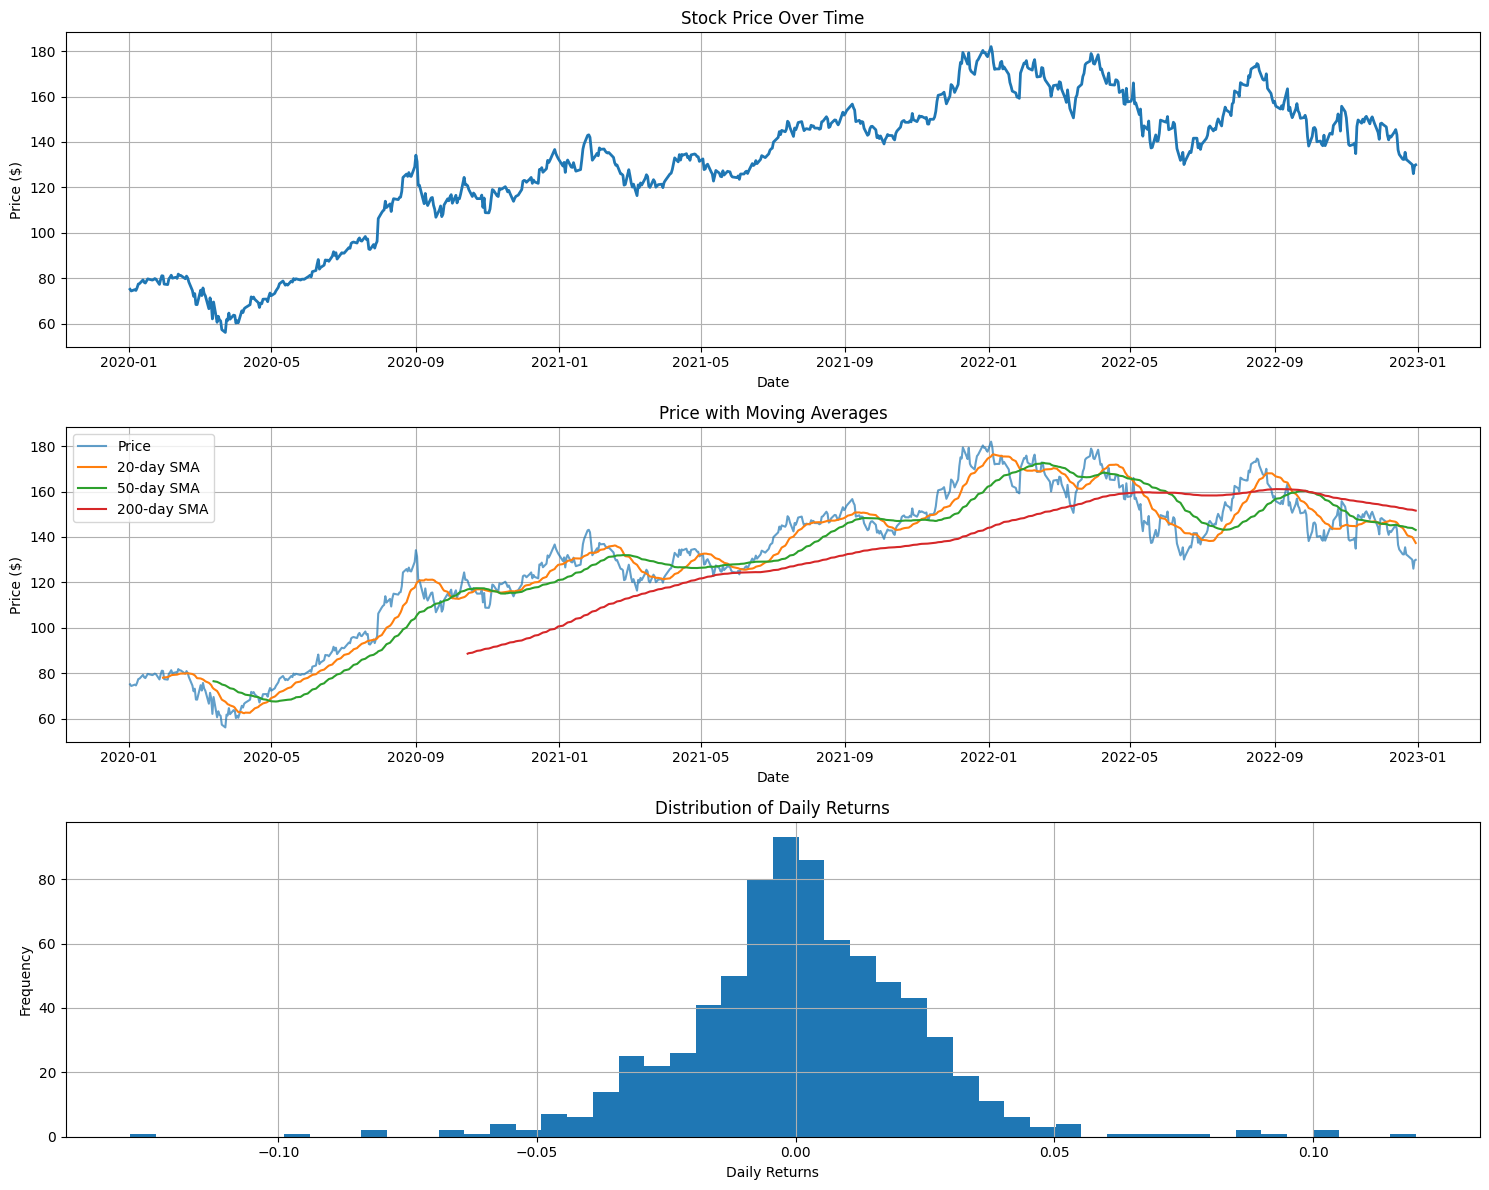


Summary Statistics:
Ticker        AAPL
count   756.000000
mean    130.311812
std      30.566496
min      56.092499
25%     115.739374
50%     135.379997
75%     150.704998
max     182.009995


In [9]:
def perform_eda(data):
    """Perform exploratory data analysis with better visualization."""
    
    # Create figure with subplots
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    
    # Plot 1: Price Timeline
    axes[0].plot(data['Date'], data['Close'], linewidth=2)
    axes[0].set_title('Stock Price Over Time')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Price ($)')
    axes[0].grid(True)
    
    # Plot 2: Multiple Moving Averages
    axes[1].plot(data['Date'], data['Close'], label='Price', alpha=0.7)
    for window in [20, 50, 200]:
        sma = data['Close'].rolling(window=window).mean()
        axes[1].plot(data['Date'], sma, label=f'{window}-day SMA')
    axes[1].set_title('Price with Moving Averages')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Price ($)')
    axes[1].legend()
    axes[1].grid(True)
    
    # Plot 3: Daily Returns
    daily_returns = data['Close'].pct_change()
    axes[2].hist(daily_returns.dropna(), bins=50)
    axes[2].set_title('Distribution of Daily Returns')
    axes[2].set_xlabel('Daily Returns')
    axes[2].set_ylabel('Frequency')
    axes[2].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(data['Close'].describe())
    
    return data

data = perform_eda(data)

In [10]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

class DataPreprocessor:
    def __init__(self, data, test_size=0.2, random_state=42):
        self.data = data
        self.test_size = test_size
        self.random_state = random_state
        self.scaler = MinMaxScaler()
        
    def prepare_data(self):
        """Prepare data for modeling with proper validation."""
        # Convert dates to ordinal
        self.data['Date_Ordinal'] = pd.to_datetime(self.data['Date']).map(datetime.toordinal)
        
        # Create features and target
        X = self.data['Date_Ordinal'].values.reshape(-1, 1)
        y = self.data['Close'].values.reshape(-1, 1)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )
        
        # Scale features and target separately
        X_scaler = MinMaxScaler()
        y_scaler = MinMaxScaler()
        
        X_train_scaled = X_scaler.fit_transform(X_train)
        X_test_scaled = X_scaler.transform(X_test)
        
        y_train_scaled = y_scaler.fit_transform(y_train)
        y_test_scaled = y_scaler.transform(y_test)
        
        return (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, 
                X_scaler, y_scaler)

preprocessor = DataPreprocessor(data)
X_train, X_test, y_train, y_test, X_scaler, y_scaler = preprocessor.prepare_data()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

class ModelTrainer:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        
    def train_linear_model(self):
        """Train and evaluate linear regression model."""
        model = LinearRegression()
        model.fit(self.X_train, self.y_train)
        
        y_pred_train = model.predict(self.X_train)
        y_pred_test = model.predict(self.X_test)
        
        metrics = {
            'train_mse': mean_squared_error(self.y_train, y_pred_train),
            'test_mse': mean_squared_error(self.y_test, y_pred_test),
            'train_r2': model.score(self.X_train, self.y_train),
            'test_r2': model.score(self.X_test, self.y_test)
        }
        
        return model, metrics, y_pred_test

    def plot_predictions(self, y_pred, title):
        """Plot actual vs predicted values."""
        plt.figure(figsize=(12, 6))
        plt.scatter(self.X_test, self.y_test, color='blue', label='Actual')
        plt.plot(self.X_test, y_pred, color='red', label='Predicted')
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

trainer = ModelTrainer(X_train, X_test, y_train, y_test)
model, metrics, y_pred = trainer.train_linear_model()
trainer.plot_predictions(y_pred, 'Linear Regression Predictions')
print("\nModel Metrics:", metrics)

NameError: name 'LinearRegression' is not defined

In [ ]:
class ModelTrainer:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        
    def train_linear_model(self):
        """Train and evaluate linear regression model."""
        model = LinearRegression()
        model.fit(self.X_train, self.y_train)
        
        y_pred_train = model.predict(self.X_train)
        y_pred_test = model.predict(self.X_test)
        
        metrics = {
            'train_mse': mean_squared_error(self.y_train, y_pred_train),
            'test_mse': mean_squared_error(self.y_test, y_pred_test),
            'train_r2': model.score(self.X_train, self.y_train),
            'test_r2': model.score(self.X_test, self.y_test)
        }
        
        return model, metrics, y_pred_test

    def plot_predictions(self, y_pred, title):
        """Plot actual vs predicted values."""
        plt.figure(figsize=(12, 6))
        plt.scatter(self.X_test, self.y_test, color='blue', label='Actual')
        plt.plot(self.X_test, y_pred, color='red', label='Predicted')
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

trainer = ModelTrainer(X_train, X_test, y_train, y_test)
model, metrics, y_pred = trainer.train_linear_model()
trainer.plot_predictions(y_pred, 'Linear Regression Predictions')
print("\nModel Metrics:", metrics)

In [ ]:
class ModelEvaluator:
    def __init__(self, models_dict):
        self.models = models_dict
        
    def compare_models(self):
        """Compare different models' performance."""
        results = []
        for name, model in self.models.items():
            train_score = model.score(X_train, y_train)
            test_score = model.score(X_test, y_test)
            train_mse = mean_squared_error(y_train, model.predict(X_train))
            test_mse = mean_squared_error(y_test, model.predict(X_test))
            
            results.append({
                'Model': name,
                'Train R2': train_score,
                'Test R2': test_score,
                'Train MSE': train_mse,
                'Test MSE': test_mse
            })
        
        return pd.DataFrame(results)
    
    def plot_learning_curves(self):
        """Plot learning curves for all models."""
        plt.figure(figsize=(15, 5))
        
        for name, model in self.models.items():
            train_sizes, train_scores, test_scores = learning_curve(
                model, X_train, y_train, cv=5, n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 10))
            
            train_mean = np.mean(train_scores, axis=1)
            test_mean = np.mean(test_scores, axis=1)
            
            plt.plot(train_sizes, train_mean, label=f'{name} (train)')
            plt.plot(train_sizes, test_mean, label=f'{name} (test)')
        
        plt.title('Learning Curves')
        plt.xlabel('Training Examples')
        plt.ylabel('Score')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

# Create and evaluate models
models = {
    'Linear': LinearRegression(),
    'Polynomial': make_pipeline(PolynomialFeatures(3), Ridge(alpha=0.1)),
    'Ridge': Ridge(alpha=0.1)
}

evaluator = ModelEvaluator(models)
results = evaluator.compare_models()
print("\nModel Comparison:")
print(results)

evaluator.plot_learning_curves()